In [1]:
from eiscirc import ImpedanceModel, ImpedanceFitter
import numpy as np
import matplotlib.pyplot as plt

In [2]:
model_fit = ImpedanceModel("R0-R1//(CPE1-R2)")
frequencies = np.logspace(-3, 6, 1000)  # 1mHz to 1MHz
omega = 2 * np.pi * frequencies
Z_data = model_fit.impedance(omega)
fitter = ImpedanceFitter(model_fit, frequencies, Z_data)
print(fitter.bounds["R1"])
fitter.bounds["R1"]=(0.001,2000)
model_fit.bounds.R1=(0.001,3000)
print(fitter.bounds["R1"])
print (model_fit.bounds.R1)

model_fit.params.R1 = 35
print(fitter.initial_guess["R1"], model_fit.params.R1)

fitter.initial_guess["R1"] = 45
print(fitter.initial_guess["R1"], model_fit.params.R1)

(0.001, 1000000.0)
(0.001, 2000.0)
(0.001, 2000.0)
35 35
45 45


0.75
0.75


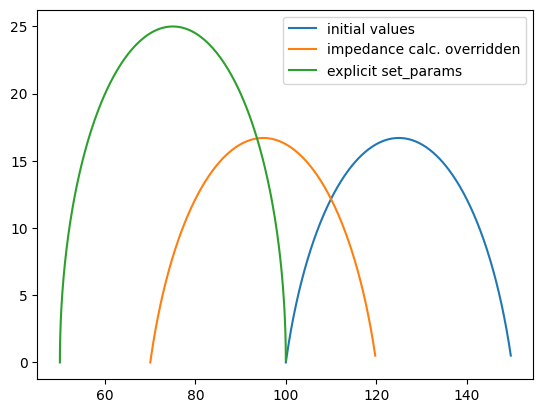

In [3]:
frequencies = np.logspace(-3, 6, 1000)  # 1mHz to 1MHz
omega = 2 * np.pi * frequencies

model = ImpedanceModel("R0-H1//R1")
print (model.params)

print (model.params.H1.alpha)
Z_custom = model.impedance(omega)
plt.plot(model.Z_real,-model.Z_imag,label = "initial values")

Z_custom = model.impedance(omega, R0=70)
print (model.params.H1.alpha)
plt.plot(model.Z_real,-model.Z_imag,label = "impedance calc. overridden")

model.set_params(R0=50)
model.params.H1_alpha = 1.
Z_custom = model.impedance(omega, H1_alpha = 1.)

plt.plot(model.Z_real,-model.Z_imag,label = "explicit set_params")

plt.legend()

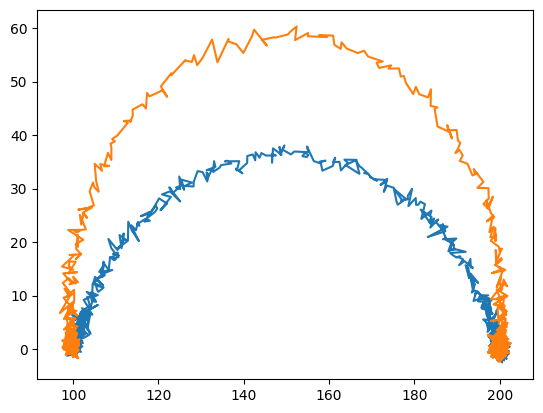

In [4]:
# Create a circuit and generate synthetic data
model = ImpedanceModel("R0-CPE1//R1")

frequencies = np.logspace(-3, 6, 1000)  # 1mHz to 1MHz
omega = 2 * np.pi * frequencies
Z_ideal = model.impedance(omega)

noise = 0.9 * np.random.normal(size=Z_ideal.shape)  # 90% noise
Z_data = Z_ideal + noise
plt.plot (Z_data[:len(omega)], -Z_data[len(omega):])

model.bounds.CPE1.alpha = (0,1.1)

#true_params = {"R0": 100,"CPE1": (1e-6, 1.1), "R1": 500}
#model.set_params(**true_params)

model.set_params(**{"CPE1_alpha":1.1})
Z_ideal = model.impedance(omega)

#Z_ideal = model.impedance(omega, true_params)
#Z_ideal = np.concatenate([model.Z_real, model.Z_imag])

noise = 0.9 * np.random.normal(size=Z_ideal.shape)  # 90% noise
Z_data = Z_ideal + noise
plt.plot (Z_data[:len(omega)], -Z_data[len(omega):])

(0.001, 1000000.0)
(0.001, 1000.0)
(0.001, 1000.0)
Before fit {'R0': 10, 'R1': 100, 'CPE1': {'value': 1e-06, 'alpha': 0.5}, 'R2': 100}
After fit {'R0': np.float64(83.3499142719741), 'R1': np.float64(116.63125429363255), 'CPE1': {'value': np.float64(7.56907350832025e-07), 'alpha': np.float64(1.1007576734923106)}, 'R2': np.float64(19.34122326436902)}
After fit {'R0': np.float64(83.3499142719741), 'R1': np.float64(116.63125429363255), 'CPE1': {'value': np.float64(7.56907350832025e-07), 'alpha': np.float64(1.1007576734923106)}, 'R2': np.float64(19.34122326436902)}
RMSE: 9.11e-01


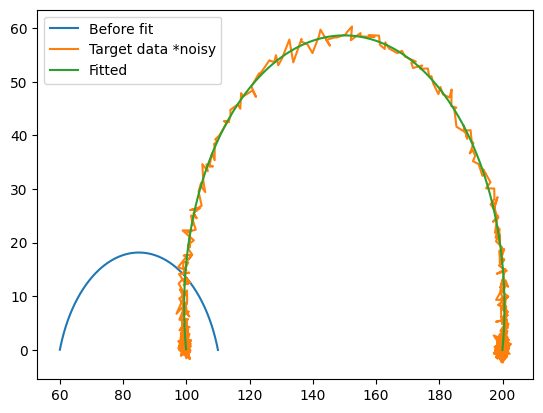

In [9]:
#model_fit = ImpedanceModel("R0-C1//R1")

#fitter = ImpedanceFitter(model_fit, frequencies, Z_data)
#fitter.set_bounds(R0=(1, 1e3))
#fitter.set_initial_guess(C1=1e-6)
#fitter.set_fixed_params(R0=100)

model_fit = ImpedanceModel("R0-R1//(CPE1-R2)")


fitter = ImpedanceFitter(model_fit, frequencies, Z_data)
print(fitter.bounds["R1"])
fitter.bounds["R1"]=(0.001,1000)
print(fitter.bounds["R1"])
print (model_fit.bounds.R1)

#fitter.set_fixed_params(R0 = 190)
model_fit.params.R0 = 10
#fitter.set_initial_guess(R0 = 190)

model_fit.bounds.CPE1.alpha = (0,1.15)
#fitter.set_initial_guess(CPE1_alpha=.905)
model_fit.params.CPE1.alpha = 0.5


plt.plot(model_fit.Z_real, -model_fit.Z_imag, label='Before fit')

print ("Before fit", model_fit._params)

result = fitter.fit()

print ("After fit", model_fit._params)
print ("After fit", result.parameters)
print(f"RMSE: {result.rmse:.2e}")

plt.plot (Z_data[:len(omega)], -Z_data[len(omega):], label = "Target data *noisy")

plt.plot(model_fit.Z_real, -model_fit.Z_imag, label='Fitted')
plt.legend()

In [14]:
# Works the same as before
model = ImpedanceModel("R0-CPE1//R1")
fitter = ImpedanceFitter(model, frequencies, Z_data)

# But now with automatic bounds checking
try:
    model.params.CPE1_alpha = 1.1  # Raises ValueError
except ValueError as e:
    print(e)  # "CPE1_alpha must be in [0.001, 1.0]"

# And consistent initialization
print(model._params['CPE1'])  # {'value': 1e-6, 'alpha': 0.8}
print(fitter.bounds['CPE1_alpha'])  # (0.001, 1.0)

CPE1_alpha must be in [0.001, 1.0], got 1.1
{'value': 1e-06, 'alpha': 0.8}
(0.001, 1.0)
